In [ ]:
import gymnasium as gym
import numpy as np
from collections import deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import random
import matplotlib.pyplot as plt
%matplotlib inline

# **Exercice 1**

## **Compréhension du cours**
1. Quelle est la différence fondamentale entre l'apprentissage par renforcement et
l'apprentissage supervisé ou non supervisé ?
2. Quels sont les composants essentiels de l'apprentissage par renforcement ?
3. Quels sont les deux types de politiques en apprentissage par renforcement ? Quelle est la
sortie associée à chaque politique en fonction de l'état d'entrée ?
4. Quel est l'impact du facteur gamma dans le calcul du retour (return) ?
5. Quel est le principe des méthodes de gradient de politique ? Expliquez les grandes étapes de
l'algorithme REINFORCE.

1. La principale différence entre  l'apprentissage par renforcement et l'apprentissage supervisé ou non supervisest la mise en place d'une nouvelle variable "la récompense". L'agent doit apprendre à la maximiser afin d'optimiser le modèle. L'agent apprend le modèle optimal à travers l'expérience en maximisant sa récompense.

2. Les composantes essentielles  à définir pour un modèle de RL sont:


*   Les actions possibles dans l'environnement
*   Définir l'environnement de jeu c'est à dire les limites du jeu
* La récompense associée aux actions prises par l'agent
*  Les vecteurs d'état en particulier les données nécessaires à l'agent pour prendre une décision
* La policy c'est à dire la stratégie pour atteindre les objectifs

3.Les deux types de politiques en apprentissage par renforcement sont:
* Une politique deterministe qui renvoie une action en fonction d'un état a=π(s)
* Une politique stochastique qui renvoie une distribution de probabilité en fnction d'un état donné π(a|s) = P(A=a|S=s).

4. Le facteur gamma va infleuncer l'exploration du modèle. En effet, ce facteur influe sur la possibilité de l'agent à se projeter dans le futur. Plus le gamma est proche plus il pourra prendre en considération ces actions futures.

5. L'objectif des méthodes gradient en RL est de trouver les paramètres optimaux afinde maximiser le return.
Etapes del'algorithme:


1.   Initialisation des paramètres
2.   Faire marcher le modèle pendant plusieurs épisodes
3.   Calculer le Return
4.   Calculer le gradient du return
5.   Mettre à jour la politique avec les nouveaux paramètes
6. Refaire les actions 2 à 5





## **QCM : Concepts clés du Reinforcement Learning**
**Question 1 : L’état (state)**

**Dans le contexte du RL, quel énoncé est faux concernant l’état (state) ?**

A) L’état $s_{t}$​ représente toutes les informations nécessaires pour déterminer les récompenses futures.

B) Deux états différents peuvent mener à la même action optimale.

C) L’état peut être défini par des caractéristiques partielles de l’environnement sans impacter la politique optimale.

D) Si un agent suit une politique optimale, il connaîtra nécessairement la séquence exacte des états futurs.

**La réponse D est fausse car un agent peut etre défini par un modèle stochastique ce qui entrainera des distribution de probabilités pour les actions et non une action déterminée. Cette distribution de probabilité engendre donc des séquences d'états aléatoires**


**Question 2 : La politique (policy)**

**Quelle affirmation est correcte concernant la politique $\pi$ d’un agent ?**

A) Une politique stochastique assigne une probabilité aux actions, tandis qu’une politique déterministe choisit toujours la même action pour un état donné.

B) Toute politique déterministe est nécessairement meilleure qu’une politique stochastique.

C) La politique optimale est toujours unique pour un problème donné.

**La réponse B est fausse car tout dépend du problème et de l'environnement de départ**

**Question 3 : La Value Function**

Quelle est la bonne définition de la value function $V_{\pi}(s)$?

A) C’est la somme des récompenses obtenues par l’agent en suivant la politique $\pi$ à partir de l’état s.

B) C’est l’espérance du return $G_{t}$​, conditionnée par le fait que l’agent commence à s et suit la politique $\pi$.

C) Elle est définie uniquement pour les politiques optimales et ne peut pas être calculée pour une politique aléatoire.

**La réponse B correspond à la définition de la value fonction de $V_{\pi}(s)$. Cette espérance correspond à la valeur moyenne attendue en fonction d'un état de départ s.**



**Question 4 : La Q-function**

Pourquoi la Q-function $Q_{\pi}(s,a)$ est-elle plus informative que la value function $V_{\pi}(s)$?

A) Elle prend en compte à la fois l’état actuel et l’action choisie, contrairement à $V_{\pi}(s)$.

B) Elle est toujours plus précise et plus rapide à calculer que $V_{\pi}(s)$.

C) Elle ne dépend pas de la politique $\pi$ et peut être utilisée dans n'importe quel contexte.

D) Elle ne peut être utilisée que pour des politiques déterministes.

**La réponse A est correcte. Elle permet de prendre en considération à la fois l’état actuel et l’action choisie. Cette valeur fournit ainsi des informations suplémentaires concernant les actions à prendre.**

## **Exemple d'application : Gestion du niveau d'eau dans un réservoir de refroidissement**

### **Description**
Dans un processus de fabrication de semi-conducteurs, l'étape de refroidissement des équipements nécessite un système de gestion du niveau d'eau dans un réservoir de refroidissement. L'eau est utilisée pour maintenir une température stable dans les équipements sensibles.

Le réservoir de refroidissement doit être maintenu à un niveau optimal pour garantir une efficacité maximale. Si le niveau d'eau est trop bas, cela peut entraîner une panne de la pompe de refroidissement, risquant une surchauffe des équipements. Si le niveau est trop élevé, l'eau peut déborder ou provoquer des pertes d'efficacité.

### **Objectif de l'Exercice**
L'agent doit réguler le niveau d'eau du réservoir en choisissant entre deux actions : ajouter ou retirer de l'eau. Son objectif est de maintenir ce niveau dans une plage acceptable. Les quantités d'eau modifiées à chaque action sont déterminées aléatoirement selon une distribution uniforme dans l'intervalle [0, 0.5].

### **Valeurs possibles pour le niveau d'eau**
- **Plage de variation** : Le niveau d'eau peut aller de **0 à 12 litres**.  
- **Plage optimale** : Il est préférable qu'il reste entre **4 et 8 litres**.  
- **Limite stricte** : Un niveau supérieur à **12 litres** est interdit en raison de la capacité maximale du réservoir.

### **Questions**
1.   Quelle est la représentation de l’état ($s_{t}$) de l'agent dans cet exercice ?
2.   Quelles sont les actions ($a_{t}$) possibles pour l’agent ? Quel est le type de variables aléatoires pour modéliser ce type d'espace d'actions ?
3.   Comment définir une fonction de récompense ($R_{t}$) qui encourage l’agent à maintenir le niveau d’eau dans la plage optimale ?
4.   Sur la base des questions 1, 2 et 3 et des exemples du code présentés dans le cours, implémenter l’agent en utilisant l’algorithme REINFORCE pour l’entrainement.


### **Réponses**

1. L’état ($s_{t}$) de l'agent est déterminé par le niveau d'eau de le réservoir
2. les actions ($a_{t}$) possibles sont ajouter ou retirer de l'eau dans le réservoir. Nous pourrions mettre en place une variable aléatoire continue pour régler le niveau d'eau.
3.  La récompense peut être définie en fonction du niveau de l'eau. Si le niveau d'eau engendre une panne ou débordement la récompense sera fortement négative alors que si le niveau respecte la plage optimale la récompense sera positive.
On pourrait de plus ajouter des récompenses négatives faibles dans le cas où le niveau d'eau ne respecte pas la plage optimale.


# Reinforcement Learning Example for cooling step in semiconductor manufacturing industries
## 1️⃣ Problem Description
In a semiconductor manufacturing process, the equipment cooling stage requires a water level management system in a cooling reservoir. Water is used to maintain a stable temperature in sensitive equipment.

The cooling reservoir must be maintained at an optimal level to ensure maximum efficiency. If the water level is too low, it can lead to a failure of the cooling pump, risking overheating of the equipment. If the level is too high, the water can overflow or cause efficiency losses.

The goal is to use Reinforcement Learning (RL) to learn an optimal maintenance strategy. The agent must decide when to add or remove water from the tank in order to avoid failures

## Definition of RL Elements

### ✅ State:
The machine's state is represented as a vector of one continuous variables:

    Water level(L): [0,12]

### ✅ Actions:
The agent can choose between two actions:

    Action 0: Add water
    Action 1: Remove Water

### ✅ Reward:

The Rewards will depends on the water level:

    Level between ]-inf,0[→ -50 (negative reward)
    Level between [0,4[→ 0 (no reward)
    Level between [4,8]→ 100 (positive reward)
    Level between ]8,12]→ 0 (no reward)
    Level over 12 Liters→ -50 (negative reward)

✅ Agent’s Objective:
Maximize the cumulative reward by learning when to add or remove water in the tank in order to avoid failures.

3️⃣ Algorithm Used
The REINFORCE (Policy Gradient) algorithm is used to train the agent. The agent updates its policy based on the rewards obtained after each episode.

Policy Model:

    Neural network with 1 input (state),
    Fist hidden layers - Dense  (h_size=16),
    Second hidden layer - Dense (h_size_1=32),
    Dense (2 outputs)

Optimization: Adam algorithm with a learning rate of 1e-3.
Discount factor reduction (gamma=0.9) to improve short-term learning.


In [ ]:
# Définition de l'environnement du réservoir
class Réservoir:
    def __init__(self):
        self.reset()

    def reset(self):
        """Environment reset"""
        self.state = np.array([
            np.random.uniform(4, 8),  # Initial water level
        ], dtype=np.float32)
        return self.state

    def step(self, action):
        """Status update based on agent action"""
        done = False
        reward = 0
        if action == 1:  # Add water
          if self.state[0]>12:
            reward = -50
            self.state = np.array([
                np.random.uniform(4, 8),  #Level reset
              ], dtype=np.float32)
          elif 8<self.state[0]<=12:
            reward=0
            self.state[0] += np.random.uniform(0, 0.5) #Increase Level

          elif 4<=self.state[0]<=8:
            reward=100
            self.state[0] += np.random.uniform(0, 0.5) #Increase Level
          elif 0<=self.state[0]<4:
            reward=0
            self.state[0] += np.random.uniform(0, 0.5)
          else:
            reward=-50
            self.state = np.array([
                np.random.uniform(4, 8),  #Level reset
              ], dtype=np.float32)
        else: # Remove water
          if self.state[0]>12:
            reward = -50
            self.state = np.array([
                np.random.uniform(4, 8),  #Level reset
              ], dtype=np.float32)
          elif 8<self.state[0]<=12:
            reward=0
            self.state[0] -= np.random.uniform(0, 0.5) #Decrease Level

          elif 4<=self.state[0]<=8:
            reward=100
            self.state[0] -= np.random.uniform(0, 0.5) #Decrease Level
          elif 0<=self.state[0]<4:
            reward=0
            self.state[0] -= np.random.uniform(0, 0.5)
          else:
            reward=-50
            self.state = np.array([
                np.random.uniform(4, 8),  #Level reset
              ], dtype=np.float32)
        return self.state, reward, done

In [ ]:
# Définition du modèle de politique
class Policy(nn.Module):
    def __init__(self, s_size=1, h_size=16,h_size_1=32, a_size=2):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(s_size, h_size)
        self.fc2 = nn.Linear(h_size, h_size_1)
        self.fc3 = nn.Linear(h_size_1, a_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.gumbel_softmax(x, tau=1, hard=False)

    def act(self, state,epsilon = 0.1):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(state)
        m = Categorical(probs)
        entropy = m.entropy()  # Compute the entropy
        action = m.sample()

        return action.item(), m.log_prob(action), entropy

# Initialisation de l'environnement et du modèle

env = Réservoir()
print('state:', env.state)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
policy = Policy().to(device)
optimizer = optim.RMSprop(policy.parameters(), lr=1e-3)

state: [4.302451]


In [ ]:
from re import escape
# Algorithme REINFORCE
def reinforce(n_episodes=1000, max_t=500, gamma=0.9, print_every=10):
    scores_deque = deque(maxlen=100)
    scores,avg_scores,t_table,action_0_table = [],[],[],[]
    for i_episode in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()
        action_0 = 0
        for t in range(max_t):
            action, log_prob, entropy = policy.act(state)
            if action == 0:
                action_0 += 1
            saved_log_probs.append(log_prob)
            state, reward, done = env.step(action)
            rewards.append(reward)
            if done:
               break
        action_0_table.append(action_0)
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        if t <max_t:
            t_table.append((i_episode,t))

        # Calcul des récompenses cumulatives
        discounts = [gamma**i for i in range(len(rewards))]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        policy_loss = []
        for log_prob in saved_log_probs:
            entropy_bonus = 0.01 * entropy
            policy_loss.append(-log_prob * R - entropy_bonus)
            #policy_loss.append(-log_prob * R)
        policy_loss = torch.cat(policy_loss).sum()

        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if i_episode % print_every == 0:
            print(f'Episode {i_episode}\tAverage Score: {np.mean(scores_deque):.2f}')
            avg_scores.append(np.mean(scores_deque))

    return scores, avg_scores, t_table, action_0_table

# Exécution de l'entraînement
scores,avg_scores,t_table, action_0_table = reinforce()

Episode 10	Average Score: 16352.00
Episode 20	Average Score: 15926.00
Episode 30	Average Score: 15228.00
Episode 40	Average Score: 15915.50
Episode 50	Average Score: 16365.20
Episode 60	Average Score: 17221.50
Episode 70	Average Score: 16328.86
Episode 80	Average Score: 15146.00
Episode 90	Average Score: 14446.67
Episode 100	Average Score: 13818.80
Episode 110	Average Score: 13231.40
Episode 120	Average Score: 12831.50
Episode 130	Average Score: 13866.50
Episode 140	Average Score: 13835.30
Episode 150	Average Score: 14186.30
Episode 160	Average Score: 14339.60
Episode 170	Average Score: 15308.30
Episode 180	Average Score: 16997.90
Episode 190	Average Score: 17281.40
Episode 200	Average Score: 17254.10
Episode 210	Average Score: 17132.90
Episode 220	Average Score: 17378.00
Episode 230	Average Score: 16752.20
Episode 240	Average Score: 16925.60
Episode 250	Average Score: 16006.70
Episode 260	Average Score: 15141.80
Episode 270	Average Score: 14726.90
Episode 280	Average Score: 15236.60
E

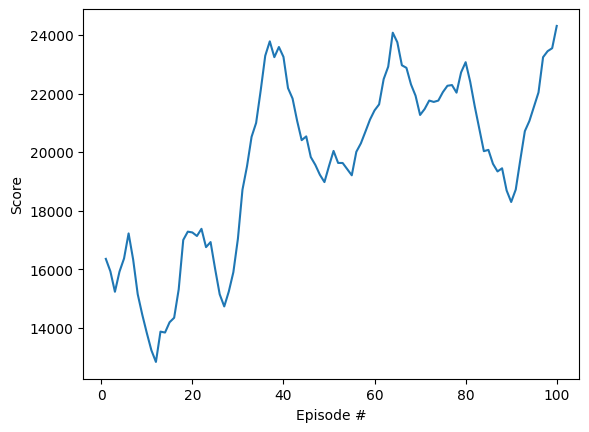

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

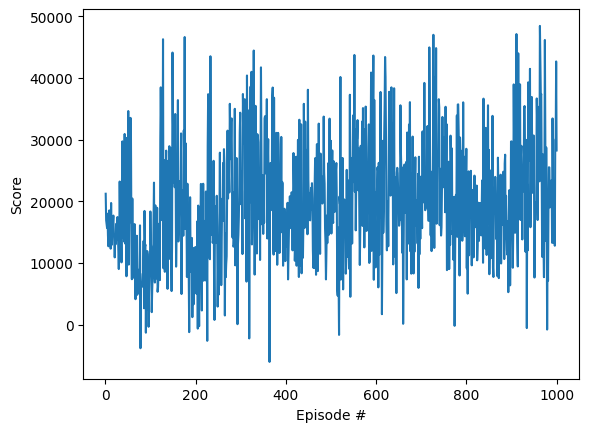

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

[216, 115, 49, 36, 44, 35, 58, 80, 128, 132, 119, 112, 124, 100, 85, 92, 91, 69, 69, 63, 74, 61, 60, 67, 74, 62, 79, 68, 73, 94, 119, 133, 123, 107, 117, 130, 161, 185, 173, 192, 197, 166, 200, 207, 217, 234, 214, 219, 224, 252, 251, 234, 266, 257, 256, 266, 278, 271, 272, 272, 286, 276, 276, 287, 298, 283, 264, 305, 270, 275, 269, 282, 284, 289, 257, 293, 280, 277, 293, 285, 281, 286, 287, 288, 290, 293, 308, 282, 287, 273, 279, 296, 312, 280, 279, 283, 280, 276, 290, 303, 302, 307, 289, 285, 282, 289, 279, 279, 295, 287, 272, 285, 306, 283, 274, 266, 288, 279, 259, 261, 263, 270, 256, 267, 270, 258, 255, 259, 263, 257, 257, 254, 266, 256, 261, 257, 263, 262, 273, 288, 262, 282, 271, 275, 268, 264, 271, 263, 263, 263, 273, 264, 272, 260, 247, 259, 264, 273, 258, 289, 268, 265, 267, 274, 271, 274, 266, 269, 264, 268, 261, 259, 268, 269, 255, 260, 242, 286, 277, 290, 269, 279, 309, 288, 310, 283, 285, 284, 303, 295, 292, 285, 269, 282, 295, 301, 295, 295, 301, 305, 309, 306, 298, 296, 2

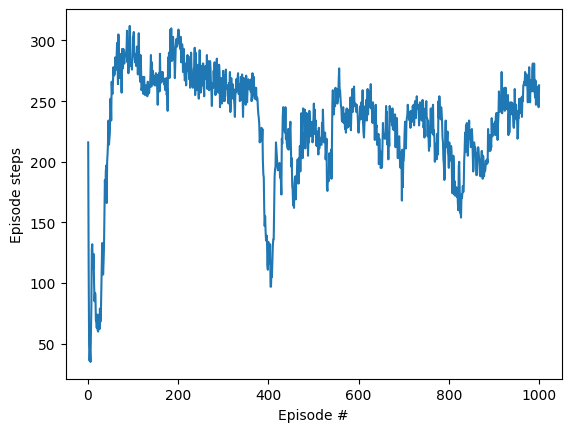

In [ ]:
#gamma = 0.9, reward of action 0: 1 - 0.1*state[4], reward of action 1: 5 if state[4] <=5 else 10, reward of failure: -50
print(action_0_table)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(action_0_table)+1), action_0_table)
plt.ylabel('Episode steps')
plt.xlabel('Episode #')
plt.show()